# K Means Clustering

In [235]:
import numpy as np
import matplotlib.pyplot as plt

Function to generate random points in the cartesian coordinate system.

In [284]:
def random_points():
    
    num_points = 80
    x = np.random.randint(0,100,num_points*2)
    points = np.array(x).reshape(num_points,2)
    
    return points


Function to fix the number of clusters and initialize the clusters with random coordinates.

In [237]:
def init_K(points):
    
    K = int(input("Enter the number of centroids :"))
    initial_centroids = []
    for i in range(K):   
        initial_centroids = initial_centroids + list(points[i])
    initial_centroids = np.array(initial_centroids).reshape(K,2)
    
    return K,initial_centroids


This function finds the centroid for every point which is closer to it and assignes it with the corresponding cluster label.

In [238]:
def cluster_assignment(K,X,centroids):
    
    cluster_assigned = np.zeros(np.size(X,0))
    for i in range(np.size(X,0)):        
        distance =  [np.linalg.norm(np.array(X[i])-np.array(centroid)) for centroid in centroids]
        cluster_assigned[i] = distance.index(min(distance))
        
    return cluster_assigned    
    

This function computes mean of the distances of every point from its corresponding cluster and moves the centroids to new positions.

In [267]:
def move_centroid(K,X,cluster_assigned):
    
    new_centroid = []
    for i in range(K):
        points = [X[j] for j in range(np.size(X,0)) if cluster_assigned[j] == i ]
        new_centroid = new_centroid + list(np.mean(points,axis = 0))
    new_centroid = np.array(new_centroid).reshape(K,2)
    
    return (new_centroid)


K Means algorithm consists of 2 main steps:

Cluster Assignment step

Move Centroid step

These steps are repeated for the given number of iterations till clusters are formed.

In [ ]:
def K_means(X):
    
    iterations = 10
    K,centroids = init_K(X)
    for i in range(iterations):
        cluster_assigned = cluster_assignment(K,X,centroids)
        centroids = move_centroid(K,X,cluster_assigned)
        
    return centroids,cluster_assigned,K
        

Function to find the closest cluster to a given point and return it's cluster label.

In [286]:
def find_close_cluster(point,centroids):
    
    X = np.array(point)
   
    dist = [np.linalg.norm(X-np.array(centroid)) for centroid in centroids]
    cluster_label = dist.index(min(dist))
    
    return cluster_label

Random points are generated. The scattered plt displays the points int the cartesian plane.
K number of clusters are formed by running the K Means algorithm on the given points.
The final plot shows K clusters formed.

Enter the number of centroids :4
The centroid coordinates : 
[[44.5625     67.625     ]
 [70.91304348 18.34782609]
 [81.94444444 76.72222222]
 [14.91304348 49.82608696]]


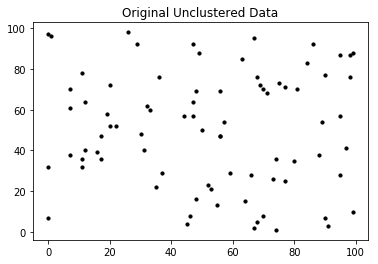

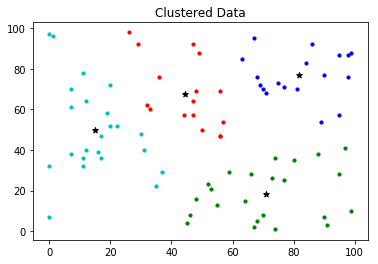

In [298]:
X = random_points()
plt.scatter(X[:,0],X[:,1],s=10,c='black')
plt.title("Original Unclustered Data")

centroids,cluster_assigned,K = K_means(X)
print("The centroid coordinates : ")
print(centroids)

fig,ax = plt.subplots()
plt.title("Clustered Data")
color = ['r','g','b','c','y','m','r','g','b','c','y','m']

for i in range(K):
    points = np.array([X[j] for j in range(np.size(X,0)) if cluster_assigned[j] == i ])
    points = points.reshape(points.shape[0],2)
    plt.scatter(points[:,0],points[:,1],c=color[i],s=10)
    
plt.scatter(centroids[:,0],centroids[:,1],marker = '*',c='black')


In [300]:
point = input("Enter a point :").split(",")
close_cluster = find_close_cluster(list(map(int,point)),centroids)
print("Cluster label assigned to given point : ",close_cluster)

Enter a point :80,65
Cluster label assigned to given point :  2
